# Homework Regression

## Team FinPro-8 InsightSeekers :
1.	Risanto Darmawan
2.	Asri Nur Azizah
3.	Fransiska Angelina
4.	Naufa Tasha Nabila


## Load Library



In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, MinMaxScaler

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2


## Data Exploration

### 1. Descriprive Statistics

In [ ]:
df = pd.read_excel('/content/youtube_statistics.xlsx')

In [ ]:
df.head(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [ ]:
print('There are',str(len(df)), 'rows in this dataset')

There are 36791 rows in this dataset


In [ ]:
df.isnull().sum()

,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0
comment_count,0


In [ ]:
print(f'trending_date : {df.trending_date.nunique()}')
print(f'title : {df.title.nunique()}')
print(f'channel_title : {df.channel_title.nunique()}')
print(f'category_id : {df.category_id.nunique()}')
print(f'publish_time : {df.publish_time.nunique()}')
print(f'tags : {df.tags.nunique()}')
print(f'views : {df.views.nunique()}')
print(f'likes : {df.likes.nunique()}')
print(f'dislikes : {df.dislikes.nunique()}')
print(f'comment_count : {df.comment_count.nunique()}')
print(f'comments_disabled : {df.comments_disabled.nunique()}')
print(f'ratings_disabled : {df.ratings_disabled.nunique()}')
print(f'video_error_or_removed : {df.video_error_or_removed.nunique()}')
print(f'description : {df.description.nunique()}')
print(f'No_tags : {df.No_tags.nunique()}')
print(f'desc_len : {df.desc_len.nunique()}')
print(f'len_title : {df.len_title.nunique()}')
print(f'publish_date : {df.publish_date.nunique()}')

trending_date : 205
title : 16431
channel_title : 1390
category_id : 17
publish_time : 12375
tags : 12463
views : 31638
likes : 15473
dislikes : 5072
comment_count : 6024
comments_disabled : 2
ratings_disabled : 2
video_error_or_removed : 2
description : 13979
No_tags : 66
desc_len : 2850
len_title : 91
publish_date : 219


#### Summary :   
- Dataset terdiri dari 36791 baris dengan 17 kolom.
- Target dari dataset ini adalah kolom views
- Tipe data kolom publish_date perlu diubah dari datetime menjadi object.
- Terdapat nilai kosong (missing value) pada column description yaitu sebanyak 45 baris
- Kolom comment_disabled, ratings_disabled, video_error_or_removed perlu dilakukan feature encoding dari True or False diubah menjadi 1 atau 0 dengan True = 1 dan False = 0 dan mengubah tipe data menjadi integer.  

In [ ]:
# Pencarian Data Numerik
num_dtypes=['int64']
#Langsung subset ys
num_df=df.select_dtypes(include=num_dtypes)
numerical=num_df.columns
print("\ndata numerik: ")
print(numerical)
# Pencarian Data Kategori
cat_dtypes=[object]
#Langsung subset ys
cat_df=df.select_dtypes(include=cat_dtypes)
categorical=cat_df.columns
print("\ndata kategori: ")
print(categorical)


data numerik: 
Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'No_tags',
       'desc_len', 'len_title'],
      dtype='object')

data kategori: 
Index(['trending_date', 'title', 'channel_title', 'publish_time', 'tags',
       'description'],
      dtype='object')


In [ ]:
df[numerical].describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,21.552173,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,6.586716,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


In [ ]:
df[categorical].describe()

,trending_date,title,channel_title,publish_time,tags,description
count,36791,36791,36791,36791,36791,36746
unique,205,16431,1390,12375,12463,13979
top,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,199,19,284,333,1120,166


#### Summary :

### 2. Univariate Analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

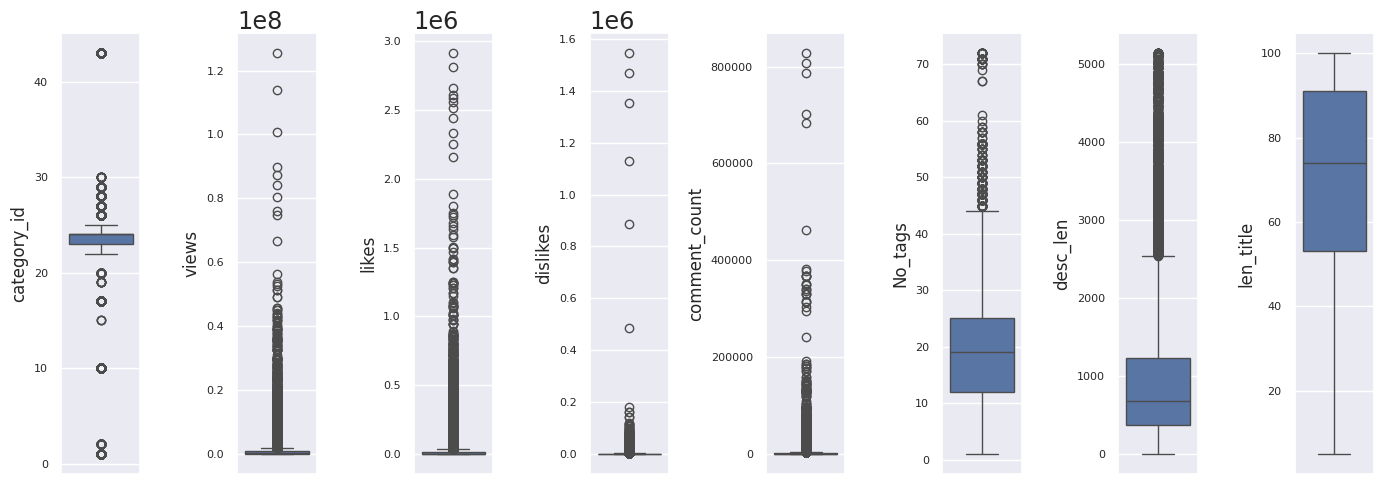

In [ ]:
features = numerical
rcParams['figure.figsize'] = 14, 5
for i in range(0, len(features)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df[features[i]], orient='v')
    plt.ylabel(features[i])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tight_layout()
plt.savefig('box.png')

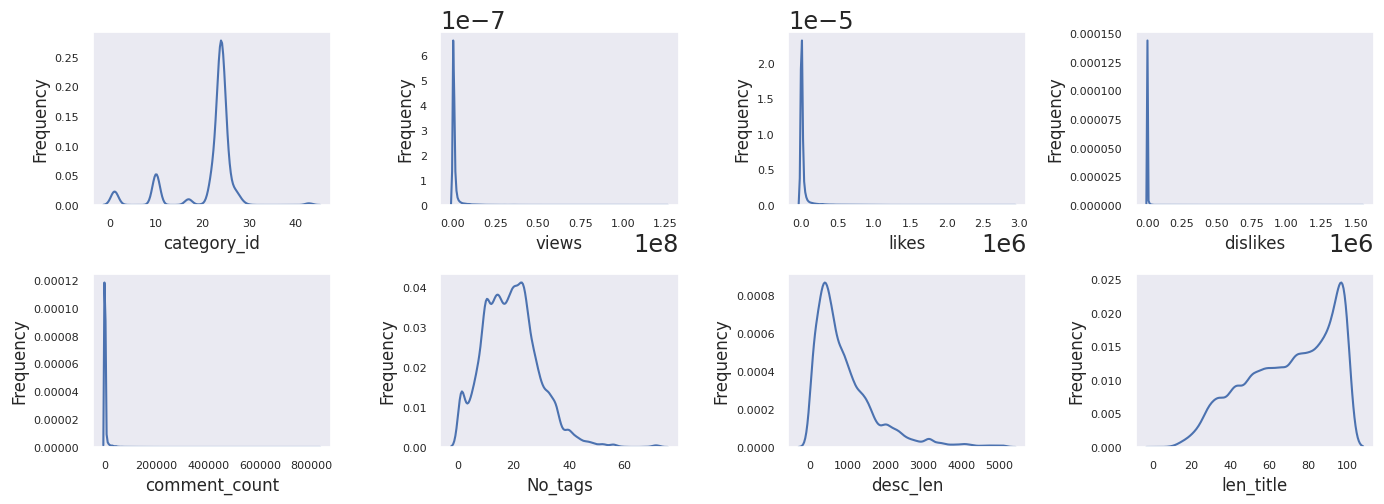

In [ ]:
features = numerical
rcParams['figure.figsize'] = 14, 12
for i in range(0, len(features)):
    plt.subplot(5, 4, i+1)
    sns.kdeplot(x=df[features[i]],)
    plt.xlabel(features[i])
    plt.ylabel('Frequency')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid()
    plt.tight_layout()

### 2. Multivariate Analysis

In [ ]:
numericals=['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'No_tags',  'desc_len', 'len_title']
df[numericals].corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title
category_id,1.000000,-0.183014,-0.127137,-0.042272,-0.035696,0.039006,0.058516,-0.053962,-0.000233,-0.148119,-0.163273
views,-0.183014,1.000000,0.850073,0.543310,0.674151,-0.034498,-0.034408,0.004920,0.055327,0.122142,-0.051559
likes,-0.127137,0.850073,1.000000,0.494518,0.780445,-0.045795,-0.040670,0.028414,0.019600,0.065086,-0.170257
dislikes,-0.042272,0.543310,0.494518,1.000000,0.708100,-0.011829,-0.015082,0.002964,0.033725,0.035031,-0.030300
comment_count,-0.035696,0.674151,0.780445,0.708100,1.000000,-0.032985,-0.024135,0.015732,0.020227,0.031604,-0.119092
comments_disabled,0.039006,-0.034498,-0.045795,-0.011829,-0.032985,1.000000,0.348523,-0.003148,-0.047492,-0.056063,0.088646
ratings_disabled,0.058516,-0.034408,-0.040670,-0.015082,-0.024135,0.348523,1.000000,-0.002507,-0.071181,-0.063888,0.052152
video_error_or_removed,-0.053962,0.004920,0.028414,0.002964,0.015732,-0.003148,-0.002507,1.000000,-0.031516,-0.006091,-0.032883
No_tags,-0.000233,0.055327,0.019600,0.033725,0.020227,-0.047492,-0.071181,-0.031516,1.000000,0.177760,0.041871
desc_len,-0.148119,0.122142,0.065086,0.035031,0.031604,-0.056063,-0.063888,-0.006091,0.177760,1.000000,0.159658


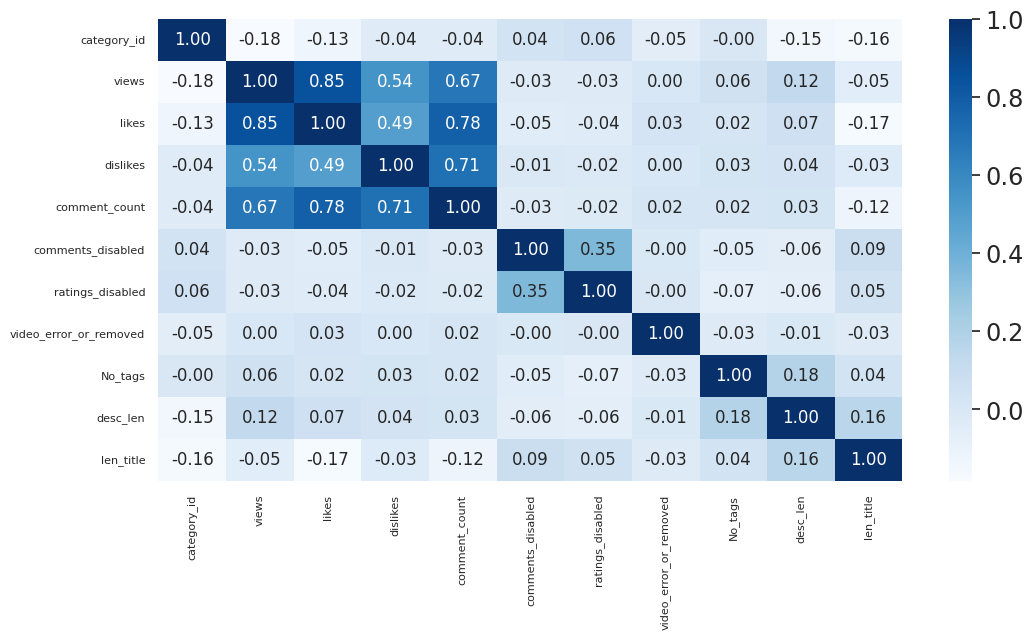

In [ ]:
rcParams['figure.figsize'] = 12, 6
sns.heatmap(df[numericals].corr(),cmap='Blues', annot=True, fmt = '.2f')
plt.tick_params(axis='both', which='major', labelsize=8)

<Figure size 1000x800 with 0 Axes>

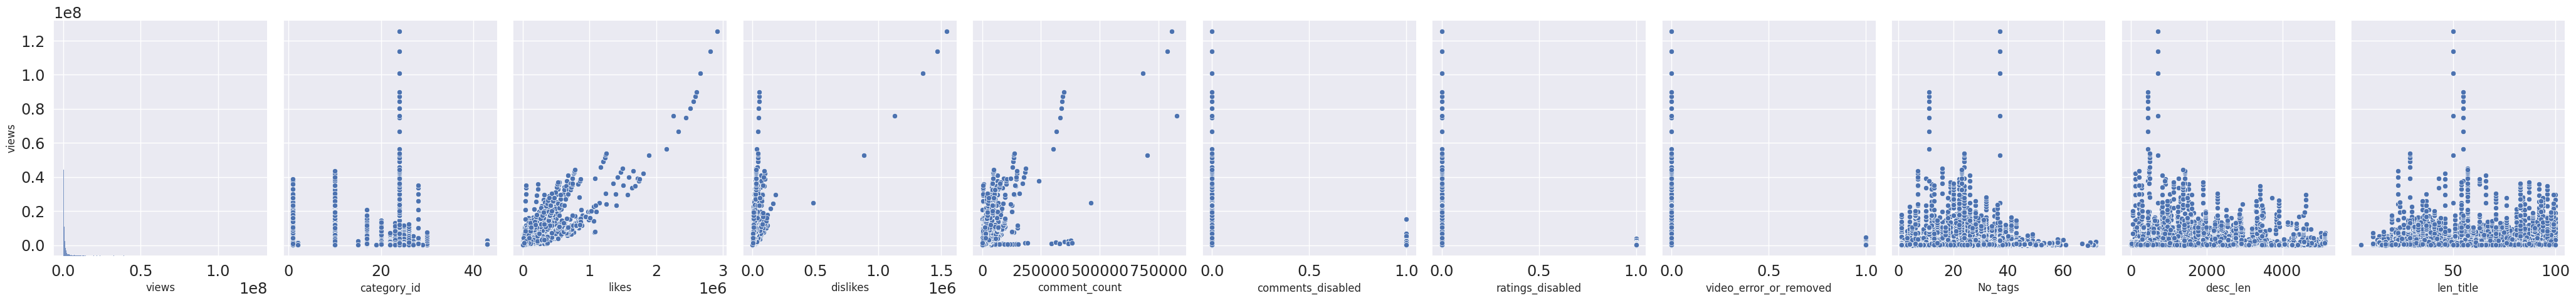

In [ ]:
plt.figure(figsize=(10,8))
pairplot = sns.pairplot(data=df, x_vars=['views','category_id','likes','dislikes','comment_count','comments_disabled', 'ratings_disabled', 'video_error_or_removed','No_tags','desc_len','len_title'], y_vars=['views'], height=5, aspect=0.75);
pairplot.fig.tight_layout()

## Data Preparation

### 1. Feature Engineering

In [ ]:
# Menghitung Engagement Rate
df['engagement_rate'] = df['likes'] + df['dislikes'] + df['comment_count'].replace(0, np.nan)
df['engagement_rate'] = df['engagement_rate'].fillna(0)
# Menghitung Like/Dislike Ratio
df['like_to_dislike_ratio'] = df['likes'] / df['dislikes'].replace(0, np.nan)
df['like_to_dislike_ratio'] = df['like_to_dislike_ratio'].fillna(0)
# Menghitung Like/Views Ratio
df['like_to_view_ratio'] = df['likes'] / df['views'].replace(0, np.nan)
df['like_to_view_ratio'] = df['like_to_view_ratio'].fillna(0)
# 5. Menghitung Comment/Views Ratio
df['comment_to_view_ratio'] = df['comment_count'] / df['views'].replace(0, np.nan)
df['comment_to_view_ratio'] = df['comment_to_view_ratio'].fillna(0)

# 13. Menangani Missing Values (Imputasi jika diperlukan)
df.fillna(0, inplace=True)

# Tampilkan hasil awal
print(df.head())

  trending_date                                              title  \
0    2017-11-14  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...   
1    2017-11-14  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...   
2    2017-11-14  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   
3    2017-11-14                     Eruma Saani | Tamil vs English   
4    2017-11-14  why Samantha became EMOTIONAL @ Samantha naga ...   

     channel_title  category_id publish_time  \
0  Lokdhun Punjabi            1     12:20:39   
1          HJ NEWS           25     05:43:56   
2             TFPC           24     15:48:08   
3      Eruma Saani           23     07:08:48   
4       Filmylooks           24     01:14:16   

                                                tags    views  likes  \
0  sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
1  पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   590101    735   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011   
3 

#### 2. Feature Selection

In [ ]:
data_clean = df.drop(['trending_date','title','channel_title','tags','publish_time','description'], axis=1)

Feature publish_time, publish_date, description, tags, title, channel_title dapat di drop karena memiliki nilai unique yang sangat besar sehingga dapat diasumsikan bahwa feature tersebut memiliki nilai yang berbeda pada masing-masing baris datanya.

### 3. Handle Missing Value

In [ ]:
missing_value = data_clean.isnull().sum().reset_index()
missing_value.columns = ['feature','missing_value']
missing_value

,feature,missing_value
0,category_id,0
1,views,0
2,likes,0
3,dislikes,0
4,comment_count,0
5,comments_disabled,0
6,ratings_disabled,0
7,video_error_or_removed,0
8,No_tags,0
9,desc_len,0


#### Note :   
Missing Value hanya terdapat pada feature description yaitu sebanyak 45 baris. Jumlah tersebut tergolong sedikit jika dibandingkan dengan total baris pada dataset sehingga, dapat dilakukan drop pada baris dengan missing value.

### 4. Handle Duplicate Value

In [ ]:
data_clean.duplicated().sum()

4229

#### Note :
Terdapat 4.229 data yang duplicate sehingga perlu dilakukan drop.

In [ ]:
data_clean = data_clean.drop_duplicates()

In [ ]:
data_clean.duplicated().sum()

0

Handling outlier

### 5. Normalization/Standardization

In [ ]:
data_clean.head()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,publish_date,engagement_rate,like_to_dislike_ratio,like_to_view_ratio,comment_to_view_ratio
0,1,1096327,33966,798,882,False,False,False,15,920,81,2017-11-12,35646.0,42.563910,0.030982,0.000805
1,25,590101,735,904,0,True,False,False,19,2232,58,2017-11-13,0.0,0.813053,0.001246,0.000000
2,24,473988,2011,243,149,False,False,False,14,482,58,2017-11-12,2403.0,8.275720,0.004243,0.000314
3,23,1242680,70353,1624,2684,False,False,False,20,263,30,2017-11-12,74661.0,43.320813,0.056614,0.002160
4,24,464015,492,293,66,False,False,False,11,753,88,2017-11-13,851.0,1.679181,0.001060,0.000142


#### Log Transformation

In [ ]:
features = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title','engagement_rate','like_to_dislike_ratio','like_to_view_ratio','comment_to_view_ratio']

data_pre = data_clean.copy()
for var in features:
    data_pre['log_'+var]= (data_clean[var]+1).apply(np.log)

In [ ]:
log = ['log_views', 'log_likes', 'log_dislikes', 'log_comment_count', 'log_No_tags', 'log_desc_len', 'log_engagement_rate', 'log_like_to_dislike_ratio','log_like_to_view_ratio','log_comment_to_view_ratio']

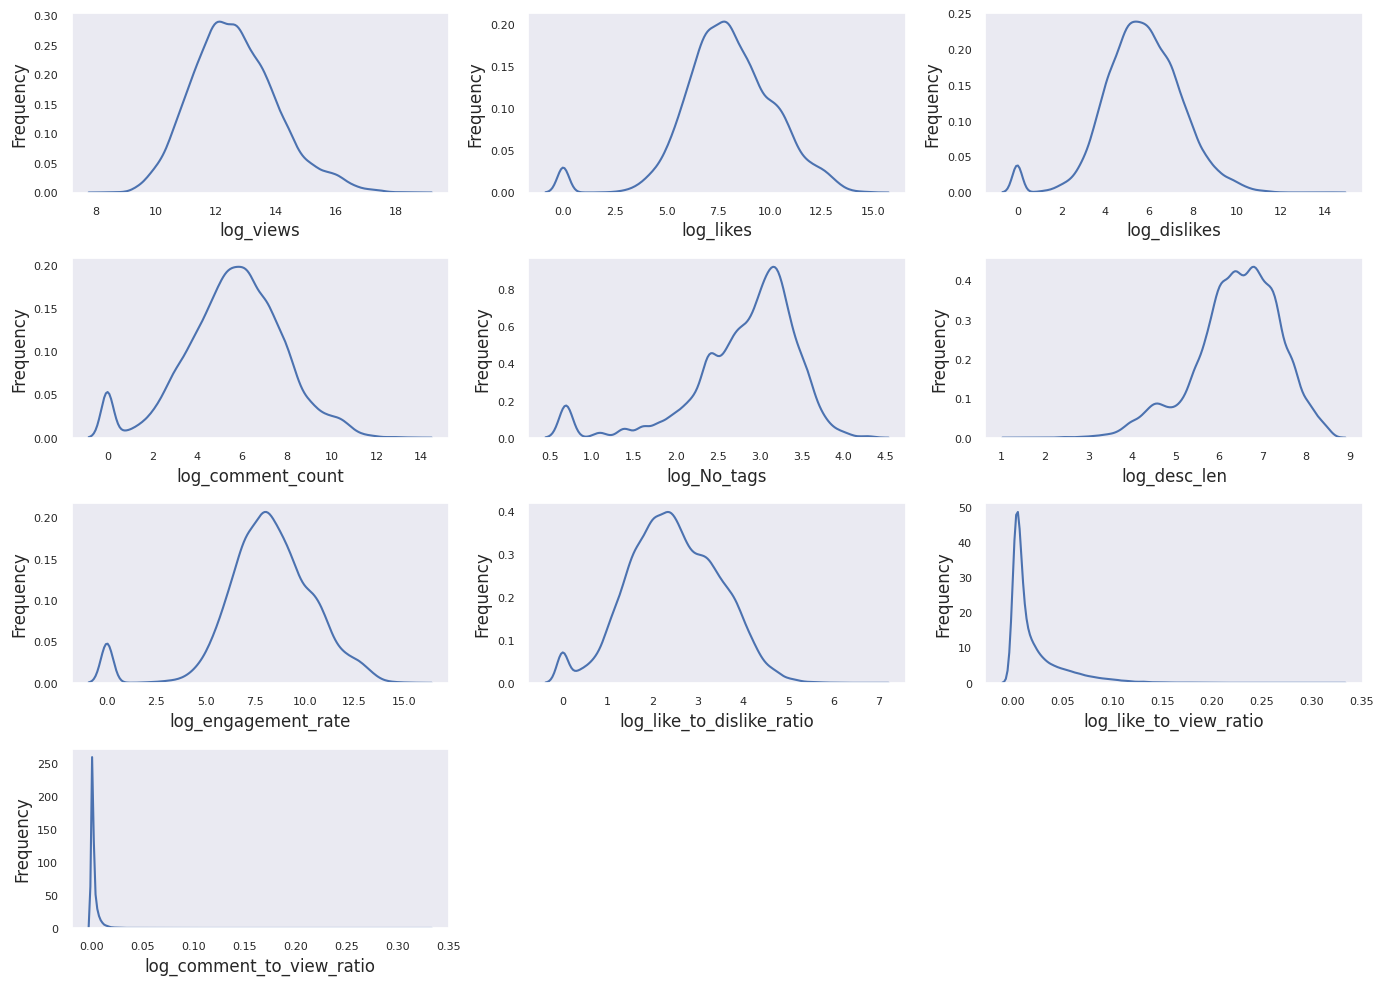

In [ ]:
features = log
rcParams['figure.figsize'] = 14, 12
for i in range(0, len(features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data_pre[features[i]],)
    plt.xlabel(features[i])
    plt.ylabel('Frequency')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid()
    plt.tight_layout()

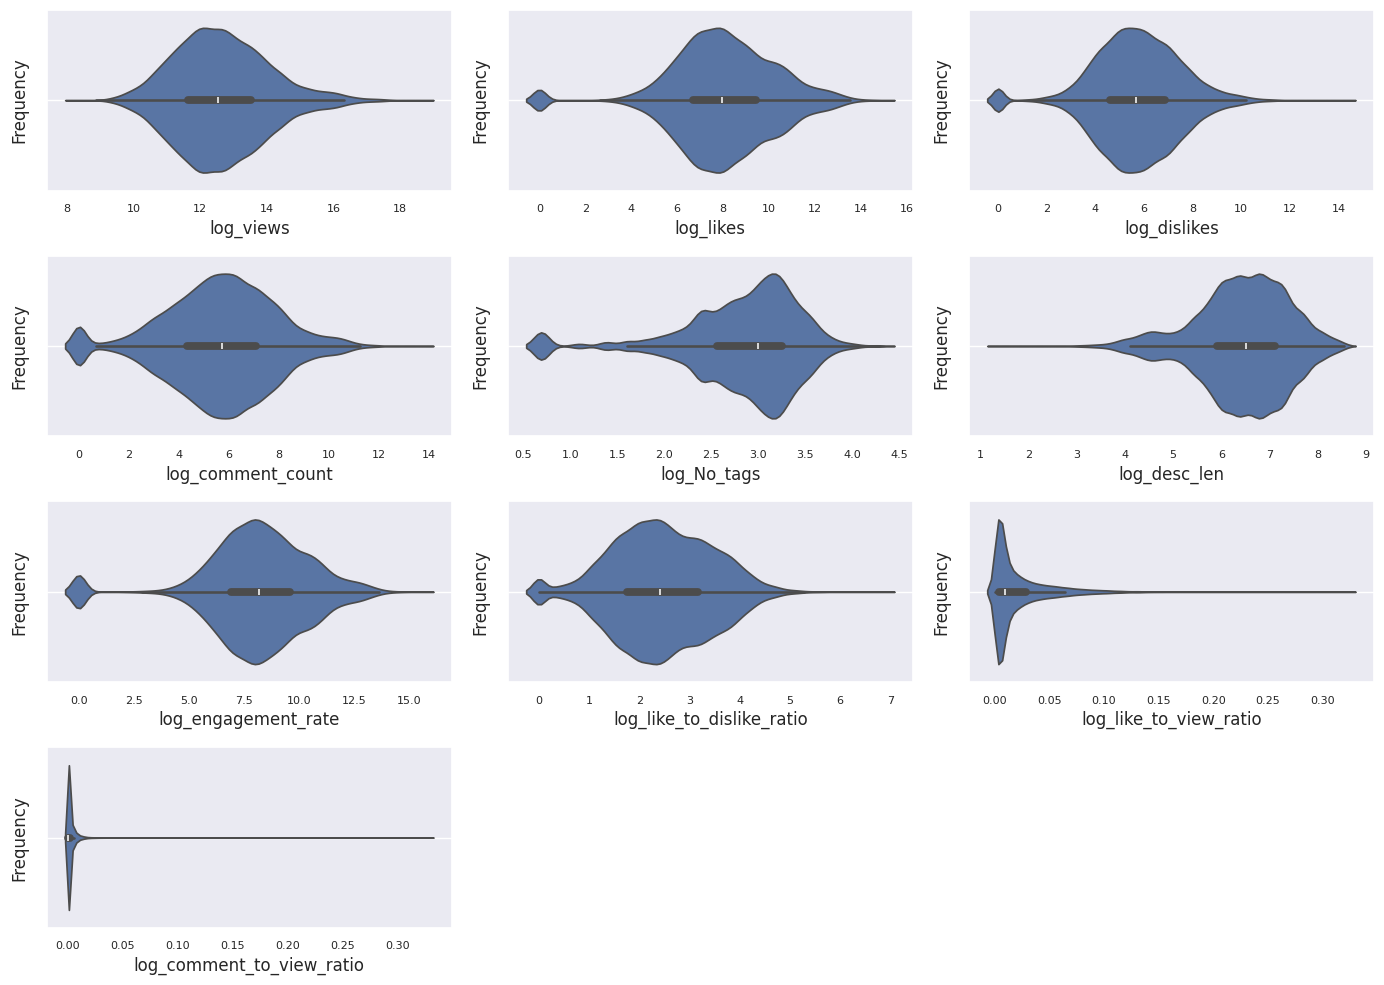

In [ ]:
features = log
rcParams['figure.figsize'] = 14, 12
for i in range(0, len(features)):
    plt.subplot(5, 3, i+1)
    sns.violinplot(x=data_pre[features[i]],)
    plt.xlabel(features[i])
    plt.ylabel('Frequency')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid()
    plt.tight_layout()

#### Normalization

In [ ]:
features = ['log_views', 'log_likes', 'log_dislikes', 'log_comment_count', 'log_No_tags', 'log_desc_len', 'log_engagement_rate', 'log_like_to_dislike_ratio','log_like_to_view_ratio','log_comment_to_view_ratio']
for var in features:
    data_pre['std_'+var]= MinMaxScaler().fit_transform(data_pre[var].values.reshape(len(data_pre), 1))

In [ ]:
data_pre.head()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,...,std_log_views,std_log_likes,std_log_dislikes,std_log_comment_count,std_log_No_tags,std_log_desc_len,std_log_engagement_rate,std_log_like_to_dislike_ratio,std_log_like_to_view_ratio,std_log_comment_to_view_ratio
0,1,1096327,33966,798,882,False,False,False,15,920,...,0.541915,0.700936,0.468990,0.497805,0.578054,0.759880,0.677241,0.552264,0.094325,0.002430
1,25,590101,735,904,0,True,False,False,19,2232,...,0.482050,0.443494,0.477732,0.000000,0.640085,0.883608,0.000000,0.087065,0.003848,0.000000
2,24,473988,2011,243,149,False,False,False,14,482,...,0.460874,0.511058,0.385751,0.367713,0.560113,0.669708,0.503009,0.325924,0.013088,0.000950
3,23,1242680,70353,1624,2684,False,False,False,20,263,...,0.554026,0.749855,0.518806,0.579419,0.653648,0.585317,0.725010,0.554784,0.170245,0.006518
4,24,464015,492,293,66,False,False,False,11,753,...,0.458819,0.416572,0.398832,0.308568,0.498083,0.731929,0.435985,0.144205,0.003276,0.000430


In [ ]:
print(data_pre.columns)


Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'No_tags', 'desc_len', 'len_title', 'publish_date', 'engagement_rate',
       'like_to_dislike_ratio', 'like_to_view_ratio', 'comment_to_view_ratio',
       'log_category_id', 'log_views', 'log_likes', 'log_dislikes',
       'log_comment_count', 'log_No_tags', 'log_desc_len', 'log_len_title',
       'log_engagement_rate', 'log_like_to_dislike_ratio',
       'log_like_to_view_ratio', 'log_comment_to_view_ratio', 'std_log_views',
       'std_log_likes', 'std_log_dislikes', 'std_log_comment_count',
       'std_log_No_tags', 'std_log_desc_len', 'std_log_engagement_rate',
       'std_log_like_to_dislike_ratio', 'std_log_like_to_view_ratio',
       'std_log_comment_to_view_ratio'],
      dtype='object')


In [ ]:
import pandas as pd
from scipy.stats import zscore

data_zscore = data_pre[['std_log_views', 'std_log_likes', 'std_log_dislikes', 'std_log_comment_count', 'std_log_No_tags', 'std_log_desc_len', 'std_log_engagement_rate', 'std_log_like_to_dislike_ratio','std_log_like_to_view_ratio','std_log_comment_to_view_ratio']]

# Menghitung Z-score untuk masing-masing kolom
data_end = data_zscore.apply(zscore)

# Menampilkan hasil
print(data_end.head())

   std_log_views  std_log_likes  std_log_dislikes  std_log_comment_count  \
0       0.904588       1.070960          0.550615               0.522857   
1       0.464577      -0.610831          0.619690              -2.531266   
2       0.308931      -0.169459         -0.107117              -0.275279   
3       0.993598       1.390538          0.944249               1.023573   
4       0.293826      -0.786704         -0.003754              -0.638146   

   std_log_No_tags  std_log_desc_len  std_log_engagement_rate  \
0        -0.082357          0.411562                 0.968802   
1         0.262526          1.334072                -3.285210   
2        -0.182105         -0.260752                -0.125618   
3         0.337934         -0.889967                 1.268859   
4        -0.526988          0.203165                -0.546620   

   std_log_like_to_dislike_ratio  std_log_like_to_view_ratio  \
0                       1.321153                    0.332601   
1                      -

#### Split Train and Test

<Axes: >

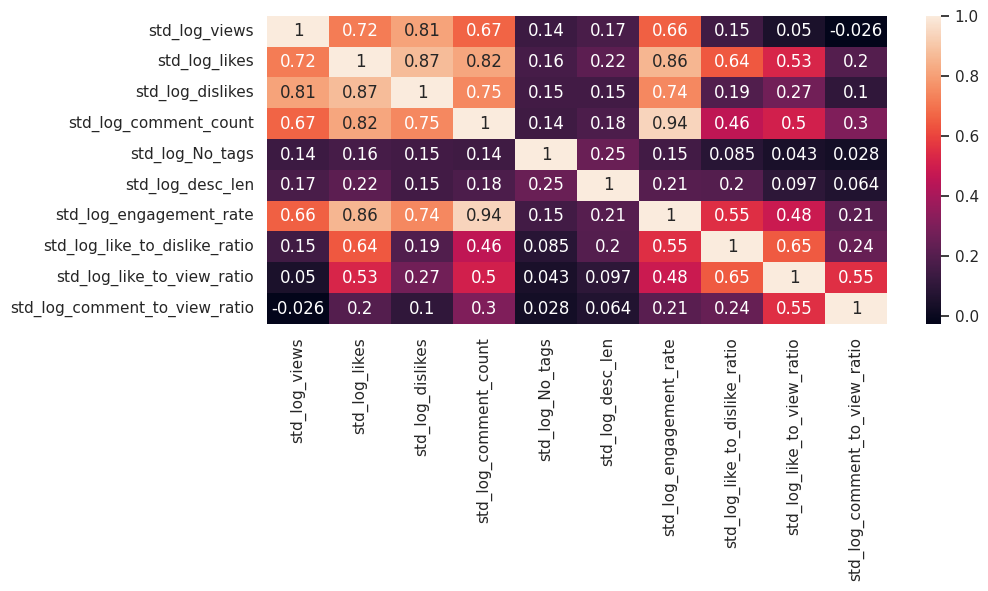

In [ ]:
sns.set(rc={'figure.figsize':(10,4)})
sns.heatmap(data_end.corr(), annot=True)

In [ ]:
data_x = data_end[['std_log_likes', 'std_log_dislikes', 'std_log_comment_count', 'std_log_No_tags', 'std_log_desc_len', 'std_log_engagement_rate', 'std_log_like_to_dislike_ratio','std_log_like_to_view_ratio','std_log_comment_to_view_ratio']]
x = data_x # menggunakan semua feature kecuali target
y = data_end['std_log_views']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

### Modelling

#### Simple Liniear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
pred = regressor.predict(xtest)

In [ ]:
np.exp(pred).round()

array([1., 2., 1., ..., 1., 1., 1.])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("RMSE    : %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred))

In [ ]:
pred = regressor.predict(xtest)
print('Coefficients: \n', regressor.coef_) # The slope
print('Intercept   : \n', regressor.intercept_) # The Intercept
eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

Coefficients: 
 [ 2.57017974 -1.2757704   0.32621864 -0.00910517  0.02906202 -0.13678301
 -1.11630848 -0.32208852 -0.02320784]
Intercept   : 
 -0.0002749493714546032
RMSE    : 0.48
R2 score: 0.77


#### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)

RMSE    : 0.11
R2 score: 0.99


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=104)
best_model1 = rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

RMSE    : 0.07
R2 score: 0.99


#### Ridge Regularization Model

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

Ridge()

In [ ]:
pred = ridge_model.predict(xtest)

print('Coefficients: \n', ridge_model.coef_) # The slope
print('Intercept: \n', ridge_model.intercept_) # The Intercept

eval_regression(ridge_model, pred, xtrain, ytrain, xtest, ytest)

Coefficients: 
 [ 2.52931383 -1.24466344  0.32705323 -0.00910108  0.02916482 -0.13642685
 -1.09653416 -0.32226357 -0.02339228]
Intercept: 
 -0.0002721099952012972
RMSE    : 0.48
R2 score: 0.77


#### Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [200, 230, 250,265, 270, 275, 290, 300, 500] # alpha
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [ ]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

RMSE    : 0.50
R2 score: 0.76


#### Random Forest Model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    # Train the model
    model.fit(xtrain, ytrain)

    # Predict on training and test data
    train_pred = model.predict(xtrain)
    test_pred = pred  # Since you already have test predictions

    # Calculate evaluation metrics for training data
    train_mae = mean_absolute_error(ytrain, train_pred)
    train_rmse = np.sqrt(mean_squared_error(ytrain, train_pred))
    train_r2 = r2_score(ytrain, train_pred)

    # Calculate evaluation metrics for test data
    test_mae = mean_absolute_error(ytest, test_pred)
    test_rmse = np.sqrt(mean_squared_error(ytest, test_pred))
    test_r2 = r2_score(ytest, test_pred)

    print("Training Data - RMSE: {:.4f}".format(train_rmse))
    print("                R²  : {:.4f}".format(train_r2))
    print("Test Data     - RMSE: {:.4f}".format(test_rmse))
    print("                R²  : {:.4f}".format(test_r2))


In [ ]:
# Fit the Random Forest model to the training data
best_model1= rf.fit(xtrain, ytrain)

# Make predictions on the test set
pred = best_model1.predict(xtest)

# evaluation the regression using the trained model (best_model1)
eval_regression(best_model1, pred, xtrain, ytrain, xtest, ytest)


Training Data - RMSE: 0.0307
                R²  : 0.9991
Test Data     - RMSE: 0.0713
                R²  : 0.9950


### Hyperparameter Tuning

In [ ]:
#Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Assuming 'df' is your DataFrame and you have a target column 'target_column'
X = df.drop(columns='target_column')  # Features
y = df['target_column']  # Target

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Create a Random Forest model
rf = RandomForestRegressor()

# Set up RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1)

# Fit the model using the training data
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", random_search.best_params_)

# Optionally, evaluate the model on the test set
best_model = random_search.best_estimator_  # Get the best model from random_search
test_pred = best_model.predict(X_test)


### Conclusion


Dari model-model Regresi di atas, model Random Forest menjadi model pilihan terbaik berdasarkan nilai R² dan RMSE

Bahwa nilai R² pada data uji model Random Forest masih sangat tinggi (0,9950) menunjukkan bahwa model tersebut dapat digeneralisasi dengan baik ke data baru. Meskipun metrik kesalahan RMSE sedikit lebih buruk pada data uji, ini merupakan tanda umum dari sedikit overfitting (di mana model berkinerja sedikit lebih baik pada data pelatihan daripada pada data baru).

Meskipun model Random Forest berkinerja sangat baik pada data pelatihan dan pengujian, sedikit peningkatan metric kesalahan pada set pengujian (dibandingkan dengan set pelatihan) dapat menjadi petunjuk adanya overfitting ringan. Ini berarti bahwa model tersebut mungkin menangkap beberapa noise atau hal-hal spesifik dalam data pelatihan yang tidak dapat digeneralisasi dengan sempurna ke data pengujian. Namun, kesenjangan antara kinerja pelatihan dan pengujian kecil, yang berarti overfitting bukanlah masalah serius.